[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Assignments/Stat_220_HW7.ipynb)

**Problem 1**: Consider the data set on bike share counts in Seoul Korea. You can read in the data using



bikes = pd.read_csv("https://richardson.byu.edu/220/bikes.csv")

Counts is the number of bicycles rented during the lunch hour each day. The continuous predictors are Temperature, Humidity, Wind_speed, Visibility and Rainfall. Seasons is a categorical variable with multiple levels and Holiday is a categorical variable with two levels.

Part a. Split the data into a training and test set.

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [2]:
bikes = pd.read_csv("https://richardson.byu.edu/220/bikes.csv")
bikes.head()

,Count,Temperature,Humidity,Wind_speed,Visibility,Rainfall,Seasons,Holiday
0,449,1.7,23,1.4,2000,0.0,Winter,No Holiday
1,479,4.3,41,1.3,1666,0.0,Winter,No Holiday
2,333,5.8,85,1.7,349,0.0,Winter,No Holiday
3,393,-0.3,38,4.8,1823,0.0,Winter,No Holiday
4,321,-2.3,25,0.0,1962,0.0,Winter,No Holiday


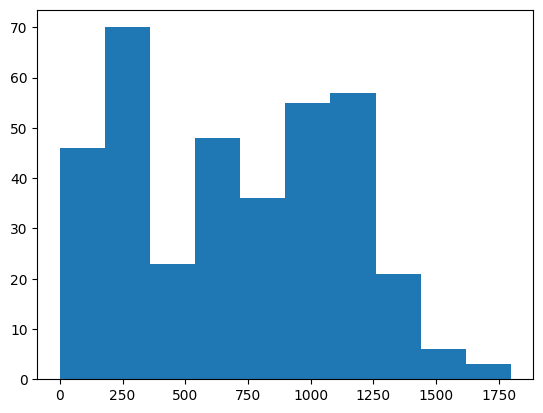

In [3]:
plt.hist(bikes.Count)
plt.show()

In [4]:
X = bikes[["Temperature", "Humidity", "Wind_speed", "Visibility", "Rainfall", "Seasons", "Holiday"]]
y = bikes["Count"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

Part b.  Build a linear regression model for the training data using all the predictors in the model with Count as the target variable.  Remove all predictors from the model with a P-Value greater than 0.05. What predictors are left?

In [9]:
formula = "Count ~ Temperature + Humidity + Wind_speed + Visibility + Rainfall + C(Seasons, Treatment('Summer')) + C(Holiday)"

# Fit model on training data
full_model = smf.ols(formula=formula, data=bikes.loc[y_train.index]).fit()

full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     38.87
Date:                Thu, 13 Nov 2025   Prob (F-statistic):           1.90e-42
Time:                        20:17:16   Log-Likelihood:                -1783.6
No. Observations:                 255   AIC:                             3587.
Df Residuals:                     245   BIC:                             3623.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                   902.9169    173.936      5.191      0.000     560.316    1245.518
C(Seasons, Treatment('Summer'))[T.Autumn]   173.3220     63.884      2.713      0.007      47.490     299.154
C(Seasons, Treatment('Summer'))[T.Spring]   207.5424     64.225      3.232      0.001      81.040     334.045
C(Seasons, Treatment('Summer'))[T.Winter]  -220.7656    109.347     -2.019      0.045    -436.146      -5.385
C(Holiday)[T.No Holiday]                    -11.6509     87.843     -0.133      0.895    -184.674     161.372
Temperature                                  15.9888      3.286      4.866      0.000       9.517      22.460
Humidity                                     -8.1314      1.192     -6.819      0.000     -10.480      -5.783
Wind_speed                                   14.0705     18.383      0.765      0.445     -22.139      50.280
Visibility                                   -0.0741      0.038     -1.947      0.053      -0.149       0.001
Rainfall                                    -59.3447     21.057     -2.818      0.005    -100.821     -17.868
==============================================================================
Omnibus:                       21.407   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.787
Skew:                          -0.405   Prob(JB):                     1.14e-10
Kurtosis:                       4.911   Cond. No.                     1.93e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.93e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
formula = "Count ~ Temperature + Humidity + Rainfall + C(Seasons, Treatment('Summer'))"

# Fit model on training data
full_model = smf.ols(formula=formula, data=bikes.loc[y_train.index]).fit()

full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     57.40
Date:                Thu, 13 Nov 2025   Prob (F-statistic):           3.44e-44
Time:                        20:20:43   Log-Likelihood:                -1785.7
No. Observations:                 255   AIC:                             3585.
Df Residuals:                     248   BIC:                             3610.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                   756.4740    113.425      6.669      0.000     533.076     979.872
C(Seasons, Treatment('Summer'))[T.Autumn]   169.5000     63.113      2.686      0.008      45.195     293.805
C(Seasons, Treatment('Summer'))[T.Spring]   228.7900     63.324      3.613      0.000     104.068     353.512
C(Seasons, Treatment('Summer'))[T.Winter]  -202.0781    108.113     -1.869      0.063    -415.015      10.859
Temperature                                  15.6430      3.265      4.792      0.000       9.213      22.073
Humidity                                     -7.0763      1.043     -6.784      0.000      -9.131      -5.022
Rainfall                                    -55.7476     21.014     -2.653      0.008     -97.135     -14.360
==============================================================================
Omnibus:                       21.561   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.883
Skew:                          -0.428   Prob(JB):                     2.96e-10
Kurtosis:                       4.843   Cond. No.                         537.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Part c. Instead of removing all predictors with a P-Value greater than 0.05, remove the largest P-Value and refit, the repeat that process until all the predictors that remain are significant (have P-Values greater than 0.05). What predictors are left in the model?

In [11]:
formula = "Count ~ Temperature + Humidity + Wind_speed + Visibility + Rainfall + C(Seasons, Treatment('Summer'))"
full_model = smf.ols(formula=formula, data=bikes.loc[y_train.index]).fit()

full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     43.91
Date:                Thu, 13 Nov 2025   Prob (F-statistic):           2.79e-43
Time:                        20:17:46   Log-Likelihood:                -1783.7
No. Observations:                 255   AIC:                             3585.
Df Residuals:                     246   BIC:                             3617.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                   890.4559    146.087      6.095      0.000     602.714    1178.198
C(Seasons, Treatment('Summer'))[T.Autumn]   174.2382     63.383      2.749      0.006      49.396     299.080
C(Seasons, Treatment('Summer'))[T.Spring]   208.1961     63.907      3.258      0.001      82.321     334.071
C(Seasons, Treatment('Summer'))[T.Winter]  -218.9637    108.283     -2.022      0.044    -432.244      -5.684
Temperature                                  16.0355      3.260      4.919      0.000       9.614      22.457
Humidity                                     -8.1375      1.189     -6.843      0.000     -10.480      -5.795
Wind_speed                                   14.1514     18.336      0.772      0.441     -21.965      50.268
Visibility                                   -0.0742      0.038     -1.955      0.052      -0.149       0.001
Rainfall                                    -59.3320     21.015     -2.823      0.005    -100.724     -17.940
==============================================================================
Omnibus:                       21.096   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.636
Skew:                          -0.394   Prob(JB):                     1.23e-10
Kurtosis:                       4.917   Cond. No.                     1.72e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.72e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
formula = "Count ~ Temperature + Humidity + Visibility + Rainfall + C(Seasons, Treatment('Summer'))"
full_model = smf.ols(formula=formula, data=bikes.loc[y_train.index]).fit()

full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     50.18
Date:                Thu, 13 Nov 2025   Prob (F-statistic):           5.07e-44
Time:                        20:17:55   Log-Likelihood:                -1784.0
No. Observations:                 255   AIC:                             3584.
Df Residuals:                     247   BIC:                             3612.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                   916.3600    142.063      6.450      0.000     636.551    1196.169
C(Seasons, Treatment('Summer'))[T.Autumn]   167.9804     62.810      2.674      0.008      44.268     291.693
C(Seasons, Treatment('Summer'))[T.Spring]   212.0480     63.660      3.331      0.001      86.663     337.433
C(Seasons, Treatment('Summer'))[T.Winter]  -222.0088    108.123     -2.053      0.041    -434.968      -9.049
Temperature                                  15.8820      3.251      4.885      0.000       9.478      22.286
Humidity                                     -8.1478      1.188     -6.857      0.000     -10.488      -5.808
Visibility                                   -0.0693      0.037     -1.853      0.065      -0.143       0.004
Rainfall                                    -59.2768     20.998     -2.823      0.005    -100.634     -17.919
==============================================================================
Omnibus:                       21.316   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.187
Skew:                          -0.415   Prob(JB):                     2.54e-10
Kurtosis:                       4.862   Cond. No.                     1.70e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
formula = "Count ~ Temperature + Humidity + Rainfall + C(Seasons, Treatment('Summer'))"

full_model = smf.ols(formula=formula, data=bikes.loc[y_train.index]).fit()

full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     57.40
Date:                Thu, 13 Nov 2025   Prob (F-statistic):           3.44e-44
Time:                        20:19:14   Log-Likelihood:                -1785.7
No. Observations:                 255   AIC:                             3585.
Df Residuals:                     248   BIC:                             3610.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                   756.4740    113.425      6.669      0.000     533.076     979.872
C(Seasons, Treatment('Summer'))[T.Autumn]   169.5000     63.113      2.686      0.008      45.195     293.805
C(Seasons, Treatment('Summer'))[T.Spring]   228.7900     63.324      3.613      0.000     104.068     353.512
C(Seasons, Treatment('Summer'))[T.Winter]  -202.0781    108.113     -1.869      0.063    -415.015      10.859
Temperature                                  15.6430      3.265      4.792      0.000       9.213      22.073
Humidity                                     -7.0763      1.043     -6.784      0.000      -9.131      -5.022
Rainfall                                    -55.7476     21.014     -2.653      0.008     -97.135     -14.360
==============================================================================
Omnibus:                       21.561   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.883
Skew:                          -0.428   Prob(JB):                     2.96e-10
Kurtosis:                       4.843   Cond. No.                         537.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

After removing the largest p-value predictors one by one I am left with the following predictors, Temperature + Humidity + Rainfall + Seasons. Important note: Winter season category with summer treatment is at a p-value of .063 which is above the .05 cutoff. However, to remove this we would either need to alter the data or exclude all of the season categories. Neither of these are good because we don't want to exlude data or significant predictors.

Part d. Regardless of whether or not you got the same set of predictors in problems 1 and 2, the two approaches can potentially give different results. Explain why.

In this example I got the same answer but that could have easily been not the case. When you remove predictors one at a time the other predictors will readjust to the removal of that predictor which can cause some predictors to increase and others to decrease. Because of this it is possible that you will remove different predictors whether you remove all at once or go one at a time. It is generally better practice to go one at a time to reduce the chance of removing a potentially significant predictor.

Part e. Find the out of sample MSE for both the model with all predictors, the model with all variables with p values above 0.05 removed, and the model with variables removed 1 at a time. which model is best?

In [19]:
formula_full = "Count ~ Temperature + Humidity + Wind_speed + Visibility + Rainfall + C(Seasons, Treatment('Summer')) + C(Holiday)"
model_full = smf.ols(formula_full, data=bikes.loc[y_train.index]).fit()

formula_b = "Count ~ Temperature + Humidity + Rainfall + C(Seasons, Treatment('Summer'))"
model_b = smf.ols(formula_b, data=bikes.loc[y_train.index]).fit()

formula_c = "Count ~ Temperature + Humidity + Rainfall + C(Seasons, Treatment('Summer'))"
model_c = smf.ols(formula_c, data=bikes.loc[y_train.index]).fit()

def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

test_data = bikes.loc[y_test.index]

pred_full = model_full.predict(test_data)
pred_b = model_b.predict(test_data)
pred_c = model_c.predict(test_data)

mse_full = mse(y_test, pred_full)
mse_b = mse(y_test, pred_b)
mse_c = mse(y_test, pred_c)

print(f"MSE for full model: {mse_full}")
print(f"MSE for model b: {mse_b}")
print(f"MSE for model c: {mse_c}")

MSE for full model: 143244.18412923478
MSE for model b: 140529.027718509
MSE for model c: 140529.027718509


The best model is either the one where predictors were removed one at a time or the one with all predictors with a p-value greater than .05 removed at the beginning. As previously stated these resulted in the same model. The lower the MSE the better.

**Problem 2** Use the same data as above and the same train-test split. Build a regression tree with a maximum depth of 2. Find the out of sample MSE.  

Part a. Build a regression tree with a maximum depth of 2. Find the out of sample MSE.

In [22]:
X = pd.get_dummies(
    bikes[["Temperature", "Humidity", "Wind_speed", "Visibility", "Rainfall", "Seasons", "Holiday"]],
    drop_first=True
)

y = bikes["Count"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)


tree = DecisionTreeRegressor(max_depth=2, random_state=1234)
tree.fit(X_train, y_train)

pred_tree = tree.predict(X_test)

mse_tree = mean_squared_error(y_test, pred_tree)

mse_tree


128853.66829205018

Part b. Increase the depth to 3, 4, 5, and 6. Check the out of sample MSE for each and report them.

In [23]:
tree = DecisionTreeRegressor(max_depth=3, random_state=1234)
tree.fit(X_train, y_train)

pred_tree = tree.predict(X_test)

mse_tree = mean_squared_error(y_test, pred_tree)

mse_tree

113250.83744842

In [24]:
tree = DecisionTreeRegressor(max_depth=4, random_state=1234)
tree.fit(X_train, y_train)

pred_tree = tree.predict(X_test)

mse_tree = mean_squared_error(y_test, pred_tree)

mse_tree

106077.2011669138

In [25]:
tree = DecisionTreeRegressor(max_depth=5, random_state=1234)
tree.fit(X_train, y_train)

pred_tree = tree.predict(X_test)

mse_tree = mean_squared_error(y_test, pred_tree)

mse_tree

119228.66162020531

In [26]:
tree = DecisionTreeRegressor(max_depth=6, random_state=1234)
tree.fit(X_train, y_train)

pred_tree = tree.predict(X_test)

mse_tree = mean_squared_error(y_test, pred_tree)

mse_tree

126318.43475319174

Part c. Based on the out of sample MSE, which depth is best?

The best depth according to MSE is a depth of 4 which produced a MSE of 106077.2011669138 which is the smallest value of the depths tested.

**Problem 3** Explain why using out of sample metrics is important for finding the best model as opposed to using in sample metrics. Out of all the models, both regression tree and linear regression models, which is the best model using out-of-sample MSE.

Using out of sample metrics (test data or data the model hasn't been trained on) is important because it sees how well the data would do on data it hasn't seen before. This gives a more accurate representation of how the model would do on real life data (which is the whole point of making these models). Furthermore if you use all of your data to train your model you risk overfitting your model to your data. This would cause bad predictions when the model runs real data.

The best model using out-of-sample MSE (all above mse were run on test data) is the decision tree with a depth of 4 which had a MSE of 106077.2011669138. This value is lower than the other decision trees and of all of the linear regressions (around 140,000 for linear regression).

**Problem 4**: A store with an online presence collects revenue data by month. This data can be found at [richardson.byu.edu/220/revenue_data.csv](https://richardson.byu.edu/220/revenue_data.csv). The variable MonthlyRevenue is the target variable. Money spent on ads (AdSpend), site traffic (AvgTraffic), and discount rates (DiscountRate) are the variables.

Part a. Split this data into a training set and a test set.

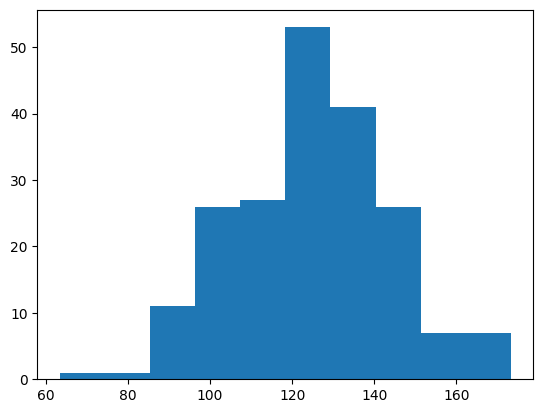

In [32]:
revenue = pd.read_csv("https://richardson.byu.edu/220/revenue_data.csv")
revenue.head()
X = revenue[["AdSpend", "AvgTraffic", "DiscountRate"]]
y = revenue["MonthlyRevenue"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

plt.hist(revenue.MonthlyRevenue)
plt.show()

Part b. Fit a linear regression model on the training set. Report the p-values for each variable.

In [35]:
formula = "MonthlyRevenue ~ AdSpend + AvgTraffic + DiscountRate"

model = smf.ols(formula=formula, data=revenue.loc[y_train.index]).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         MonthlyRevenue   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     114.6
Date:                Thu, 13 Nov 2025   Prob (F-statistic):           4.65e-37
Time:                        20:41:54   Log-Likelihood:                -517.38
No. Observations:                 140   AIC:                             1043.
Df Residuals:                     136   BIC:                             1055.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       48.8894      6.875      7.111      0.000      35.294      62.485
AdSpend          3.1361      0.181     17.344      0.000       2.778       3.494
AvgTraffic       0.0034      0.001      3.941      0.000       0.002       0.005
DiscountRate    -0.3979      0.414     -0.961      0.338      -1.216       0.421
==============================================================================
Omnibus:                        0.619   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.734   Jarque-Bera (JB):                0.545
Skew:                          -0.152   Prob(JB):                        0.762
Kurtosis:                       2.965   Cond. No.                     4.22e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Part c. Interpret the p-value for AdSpend in the context of the problem. What does the value of that p-value imply for the relationship between these variables.

AdSpend has a p-value of 0.000 which means that it is statistically significant. This means that there is strong evidence against the null hypothesis (MonthlyRevenue = 0*AdSpend). The higher the p-value the more likely it is that the slope of a given predictor is 0. Because of the low p value we can take the coefficient of 3.1361 seriously. We can assume that when everything else is held constant for each additional dollar spent in ads would result in an estimated average increase of 3.1361 dollars in monthly revenue.

Part d. Interpret the p-value for DiscountRate in the context of the problem. What does the value of that p-value imply for the relationship between these variables.

The p-value for DiscountRate is 0.338 which is quite high. Well beyond the standard 0.05 cutoff. This means that this predictor is not statistically significant and we should not take its coefficient seriously.

**Problem 5** Using the same data as problem 4.

Part a. Build three regression tree models on the training data set with a max depths of 2, 3, and 5.

In [37]:
tree2 = DecisionTreeRegressor(max_depth=2, random_state=1234)
tree2.fit(X_train, y_train)

tree3 = DecisionTreeRegressor(max_depth=3, random_state=1234)
tree3.fit(X_train, y_train)

tree5 = DecisionTreeRegressor(max_depth=5, random_state=1234)
tree5.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=1234)

Part b. Find the in sample and out of sample R^2 for all three models. (you shouold have 6 R^2 in total).

In [39]:
pred2_train = tree2.predict(X_train)
pred3_train = tree3.predict(X_train)
pred5_train = tree5.predict(X_train)

pred2_test = tree2.predict(X_test)
pred3_test = tree3.predict(X_test)
pred5_test = tree5.predict(X_test)

r2_2_in  = r2_score(y_train, pred2_train)
r2_2_out = r2_score(y_test, pred2_test)

r2_3_in  = r2_score(y_train, pred3_train)
r2_3_out = r2_score(y_test, pred3_test)

r2_5_in  = r2_score(y_train, pred5_train)
r2_5_out = r2_score(y_test, pred5_test)

print("Depth 2  — In-sample  R^2:", r2_2_in)
print("Depth 2  — Out-sample R^2:", r2_2_out)

print("Depth 3  — In-sample  R^2:", r2_3_in)
print("Depth 3  — Out-sample R^2:", r2_3_out)

print("Depth 5  — In-sample  R^2:", r2_5_in)
print("Depth 5  — Out-sample R^2:", r2_5_out)


Depth 2  — In-sample  R2: 0.6617893507059355
Depth 2  — Out-sample R2: 0.515228920836937
Depth 3  — In-sample  R2: 0.7337671484183155
Depth 3  — Out-sample R2: 0.534149703155018
Depth 5  — In-sample  R2: 0.8608803649654743
Depth 5  — Out-sample R2: 0.5484576633797065


Part c. Use these R^2 values in terms of detecting to detect any underfitting or overfitting in the models.

The higher the R^2 value the better fitted the model. As we can see from the data as we increase the depth of the trees the R^2 values rose quickly which leads me to believe that a tree with a depth of two underfits the data. Also the jump from 3 to 5 depth in R^2 In-sample data is quite large at 0.86088 while the R^2 for the Out-sample data is 0.5484577 which only saw a modest increase. This large variance in R^2 values between in and out data leads me to believe that the tree of a depth of 5 overfits the data. The best model out of these three is the tree of depth 3 because it lies in between the overfit model and underfit model. It has a higher R^2 value and there isn't as big of a gap between the In-sample and Out-sample.